In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

#Measure of success
def kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

In [2]:
pet_data = pd.read_csv("../all/train.csv", sep=",")

In [3]:
pet_data = pd.read_csv("../all/train.csv", sep=",")
breed_labels = pd.read_csv('../all/breed_labels.csv')
state_labels = pd.read_csv('../all/state_labels.csv')
color_labels = pd.read_csv('../all/color_labels.csv')

In [4]:
pet_data = pet_data.drop(columns = ['RescuerID', 'Name', 'Description', 'PetID'])
data = pet_data.iloc[:,:-1]
labels = pet_data['AdoptionSpeed']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data)


x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.33)

/Users/viteka/final_project/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
x_train

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
8771,2,4,265,0,2,4,0,0,2,2,2,1,2,1,1,0,41326,0,3.0
2869,1,42,20,0,1,2,0,0,2,1,2,2,2,1,1,0,41327,0,5.0
12160,1,3,307,128,2,2,7,0,2,2,2,1,1,1,1,0,41326,0,5.0
1951,1,3,307,0,1,1,2,0,2,1,3,3,3,1,1,0,41326,0,4.0
14146,1,1,307,0,3,2,7,0,2,1,1,1,2,1,2,0,41326,8,26.0
13268,1,6,307,0,1,3,0,0,1,1,1,1,1,1,1,0,41326,0,4.0
11720,2,3,266,0,2,1,2,0,2,1,2,1,2,1,1,0,41401,0,7.0
14436,2,2,254,0,3,1,4,7,2,2,2,2,2,1,2,0,41326,0,5.0
860,2,5,266,0,2,1,4,5,2,2,2,2,2,1,2,0,41401,0,2.0
14395,2,0,266,0,1,1,0,0,1,1,2,2,2,1,1,0,41326,0,1.0


In [6]:
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
clf.fit(X=x_train, y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [7]:
print('Test Accuracy for Decision Trees = ' + str(clf.score(X=x_test, y=y_test)))
print('Train Accuracy for Decision Trees = ' + str(clf.score(X=x_train, y=y_train)))

Test Accuracy for Decision Trees = 0.38237671786580435
Train Accuracy for Decision Trees = 0.3901443504230961


In [8]:
pred = clf.predict(x_test)
print('Train Kappa: ', kappa(y_test, pred))
pred = clf.predict(x_train)
print('Test Kappa: ', kappa(y_train, pred))

Train Kappa:  0.30476918539016207
Test Kappa:  0.30803864919313484


In [9]:
clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
clf.fit(X=x_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
print('Test Accuracy for Random Forests = ' + str(clf.score(X=x_test, y=y_test)))
print('Train Accuracy for Random Forests = ' + str(clf.score(X=x_train, y=y_train)))

Test Accuracy for Random Forests = 0.3744947453516572
Train Accuracy for Random Forests = 0.39800895968143357


In [11]:
pred = clf.predict(x_test)
print('Train Kappa: ', kappa(y_test, pred))
pred = clf.predict(x_train)
print('Test Kappa: ', kappa(y_train, pred))

Train Kappa:  0.24444228385219946
Test Kappa:  0.283324400738561


In [12]:
features = data.columns

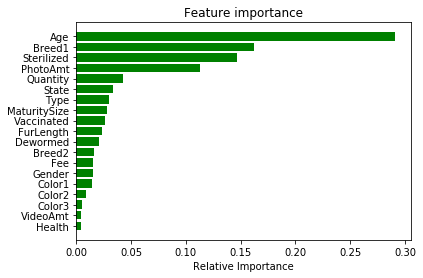

In [13]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [14]:
pet_data = pd.read_csv("../all/train.csv", sep=",")
pet_data = pet_data.drop(columns = ['RescuerID', 'Name', 'Description', 'PetID'])
data = pet_data.iloc[:,:-1]
labels = pet_data['AdoptionSpeed']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.33)

/Users/viteka/final_project/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
clf = LogisticRegression(multi_class='multinomial',
                         penalty='l2', solver='newton-cg', tol=0.1)
clf.fit(X=x_train, y=y_train)

/Users/viteka/final_project/venv/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/viteka/final_project/venv/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/viteka/final_project/venv/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.1, verbose=0, warm_start=False)

In [16]:
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(x_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Test score with L2 penalty: %.4f" % score)
score = clf.score(x_train, y_train)
print("Train score with L2 penalty: %.4f" % score)

Test score with L2 penalty: 0.3476
Train score with L2 penalty: 0.3575


In [17]:
pred = clf.predict(x_test)
print('Train Kappa: ', kappa(y_test, pred))
pred = clf.predict(x_train)
print('Test Kappa: ', kappa(y_train, pred))

Train Kappa:  0.20947668837101396
Test Kappa:  0.21805682321788422


In [18]:
pred

array([4, 2, 2, ..., 2, 4, 4])